In [2]:
import Bio
import numpy as np
import math
import random
import matplotlib.pyplot as plt
random.seed()

In [3]:
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
lam = 0.25
alph = 250
ki = 200
ka = 400
hi = 2
ha = 20

In [4]:
def compDs():
    #print(genes)
    dgAdt = (alph * (1/(1+np.power((genes["B"]/ki),hi)))) - lam*genes["A"]
    dgBdt = (alph * (1/(1+np.power((genes["A"]/ki),hi)))) - lam*genes["B"]
    dgCdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["D"]/ki),hi)))) - lam*genes["C"]
    dgDdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["C"]/ki),hi)))) - lam*genes["D"]
    dgEdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["F"]/ki),hi)))) - lam*genes["E"]
    dgFdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["E"]/ki),hi)))) - lam*genes["F"]
    return [dgAdt,dgBdt,dgCdt,dgDdt,dgEdt,dgFdt]

In [5]:
for i in compDs():
    print(i)
diffs = compDs()

1.923076923076934
1.923076923076934
0.7902967861300224
0.7902967861300224
0.7902967861300224
0.7902967861300224


In [6]:
deltt = 1
sigma = 10
tmax = 100
tmin = 0
y = 0
print(y)

0


In [7]:
def fixGenes(genes, genarr):
    #print(genes)
    genes["A"] = genarr[0]
    genes["B"] = genarr[1]
    genes["C"] = genarr[2]
    genes["D"] = genarr[3]
    genes["E"] = genarr[4]
    genes["F"] = genarr[5]
    return genes

In [8]:
sixdim = []
for rep in range(400):
    stop = random.randint(tmin,tmax-1)
    genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
    genarr = list(genes.values())
    for t in range(tmin,stop):
        for g in range(len(genes)):
            y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
            genarr[g] = y
        #print(genes)
        genes = fixGenes(genes,genarr)
        diffs = compDs()
    #print(genes)
    genarr = list(genes.values())
    sixdim.append(genarr)

[-3.0875435167060257, 8.590802972681473, -1.059279849128125, 2.624550402728261, -1.5217473361978904, -3.011884398624261]


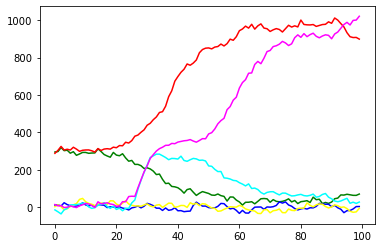

In [9]:
singrun = []
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
print(diffs)
for t in range(tmin,100):
    diffs = compDs()
    for g in range(len(genes)):
        y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
        genarr[g] = y
    #print(genes)
    genes = fixGenes(genes,genarr)
    singrun.append(genarr[:])
    #print(singrun)
singrun = np.array(singrun)
#print(singrun)
fig = plt.figure()
plt.plot(singrun[:,0], color='green')
plt.plot(singrun[:,1], color='red')
plt.plot(singrun[:,2], color='blue')
plt.plot(singrun[:,3], color='yellow')
plt.plot(singrun[:,4], color='cyan')
plt.plot(singrun[:,5], color='magenta')

In [10]:
sixdim = np.round(np.array(sixdim),2)
print(sixdim.shape)

(400, 6)


In [11]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=3)
transformed = embedding.fit_transform(sixdim)
print(transformed.shape)

(400, 3)


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(6).fit_predict(transformed)
#print(kmeans)

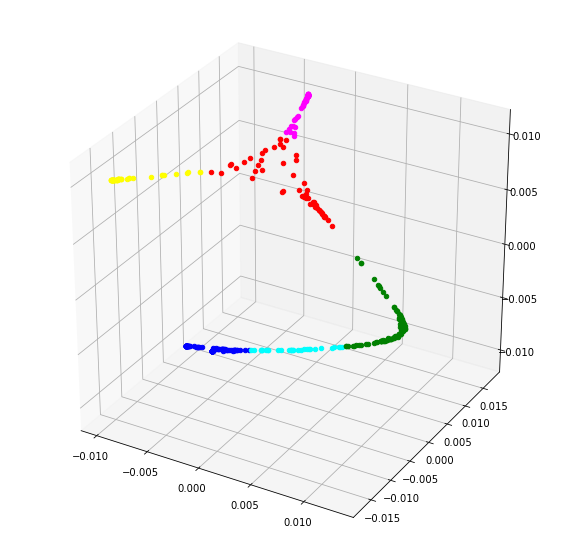

In [13]:
colors = ["red","blue","yellow","green","magenta","cyan"]
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
z_points = transformed[:,0]
x_points = transformed[:,1]
y_points = transformed[:,2]
for i in range(len(z_points)):
    coolr = colors[kmeans[i]]
    ax.scatter3D(x_points[i], y_points[i], z_points[i], c=coolr, cmap='hsv');
plt.show()

In [14]:
clusters = [[],[],[],[],[],[]]
for k in range(len(kmeans)):
    clusters[kmeans[k]].append(sixdim[k])

for e in range(len(clusters)):
    print("Cluster "+str(e))
    clusters[e] = np.mean(clusters[e],axis=0)
    print(clusters[e])
            

Cluster 0
[ 6.39975345e+02  1.29441552e+02  2.90120000e+02  2.91610517e+02
 -9.75689655e-01 -8.18965517e-02]
Cluster 1
[ 48.89485981 913.88261682   1.23327103  -2.97794393 407.25971963
 433.9771028 ]
Cluster 2
[ 9.41724082e+02  4.46242857e+01  8.67698776e+02  6.40928571e+01
  7.42244898e-01 -2.17734694e+00]
Cluster 3
[299.42663462 308.62980769  14.74605769  12.64317308  17.09711538
  18.60538462]
Cluster 4
[ 9.24347692e+02  4.74301923e+01  7.58340385e+01  8.16478654e+02
 -1.52500000e-01  3.13576923e+00]
Cluster 5
[177.516      508.36733333  -0.91966667  -1.47466667 274.28766667
 261.084     ]


In [32]:
sim_mtx = np.zeros((400,400))
sig = 30
for x in range(400):
    for y in range(400):
        if x==y:
            sim_mtx[x][y] = 1
        else:
            dist = np.sqrt(np.sum(np.power(np.subtract(sixdim[x],sixdim[y]),2)))
            calc = np.exp(-0.5*np.power((dist/(sig*sig)),2))
            #print(calc)
            sim_mtx[x][y] = calc

In [33]:
print(sim_mtx)

[[1.         0.86991039 0.17294421 ... 0.56072701 0.26935167 0.95944003]
 [0.86991039 1.         0.10665299 ... 0.35905468 0.16854255 0.72734447]
 [0.17294421 0.10665299 1.         ... 0.53653066 0.91621623 0.20054128]
 ...
 [0.56072701 0.35905468 0.53653066 ... 1.         0.7367842  0.63129168]
 [0.26935167 0.16854255 0.91621623 ... 0.7367842  1.         0.3111751 ]
 [0.95944003 0.72734447 0.20054128 ... 0.63129168 0.3111751  1.        ]]


In [34]:
La = np.zeros((400,400))
for x in range(400):
    tot = np.sum(sim_mtx[x])
    La[x] = np.divide(sim_mtx[x],tot)
print(La)

[[0.00445838 0.00387839 0.00077105 ... 0.00249993 0.00120087 0.00427755]
 [0.00525338 0.00603898 0.00064408 ... 0.00216833 0.00101783 0.00439242]
 [0.0009446  0.00058253 0.00546189 ... 0.00293047 0.00500427 0.00109533]
 ...
 [0.00194481 0.00124534 0.00186089 ... 0.00346838 0.00255545 0.00218956]
 [0.0011447  0.00071628 0.00389378 ... 0.00313122 0.00424985 0.00132245]
 [0.0039797  0.00301698 0.00083183 ... 0.00261856 0.00129074 0.00414794]]
